In [76]:
# multivariate gaussian mixture model
import random
import matplotlib.pyplot as plt
import numpy as np
sigma = []
sigma_d = []
k = 3
d=2
mu = [1,3, 5]
for i in range(k):
    num = random.uniform(0,1) 
    sigma_d.append(np.array([[1, 0], [0, 1]]))
lambda_n = [0.2,0.5, 0.3]


mu_d = np.array([mu,mu])
mu_d = np.array([[-4, 0, 4], [-5, 0, 5]])
mu_d = mu_d.transpose(1,0)
print(mu_d.shape)

(3, 2)


In [77]:
mu_d

array([[-4, -5],
       [ 0,  0],
       [ 4,  5]])

In [78]:
def create_normal_d(x, mu, cov):
    out_n = []
    for samples in x:
        # print(cov.shape)
        # print(np.matmul((samples-mu).reshape(1,-1), np.linalg.inv(cov)).shape, 'samples shape')
        out = np.exp(-0.5* np.matmul(np.matmul((samples-mu), np.linalg.inv(cov)), (samples-mu).T))
        out = out/(np.sqrt((2*np.pi)**d*np.linalg.det(cov)))
        out_n.append(out)
    
    return np.array(out_n)

In [79]:
def parzen_window_est_new(x_samples, h=1, center=[0]):
        # center  = [0]*d
        # print(center)
        # print(x_samples.shape)
        n = x_samples.shape[0]
        d = x_samples.shape[1]
        t_sum = 0
        # print(t_sum.shape, 'T-SUM')
        for items in x_samples:
            
            # print(items.shape, 'ITEMS')
            # print(center.shape, 'CENTER')
            t_sum+=create_normal_d((center-items)/h, np.zeros((d)), np.identity(d))
        
        t_sum/=n
        t_sum/=(h**d)
            
        return t_sum
            
    



In [131]:
def parzen_window_uniform_est_new(x_samples, h = 1, center=[0], d = 1):
    
    n = x_samples.shape[0]
    t_array = []
    t_sum = 0
    for ele in center:
        for items in x_samples:
            # print(items)
            value = True
            for i,d in enumerate(items):
                # print(d)
                if d - h/2 <= ele[i] and d + h/2 > ele[i]:
                    value= True
                    continue
                else:
                    value = False
                    break
            if value:
                t_sum+=1
        t_sum/=n
        t_array.append(t_sum)

    
    
    t_array = [x / h**d for x in t_array]
    print(np.array(t_array).shape)
    
    t_array = np.array(t_array).reshape(-1,1)
    return t_array


In [80]:
# sampling points 
num_samples = 1000
tp_points = []
d_points = []
print(mu_d.shape)
print(sigma_d[0].shape)
for i,lambdas in enumerate(lambda_n):
    num_new = int(num_samples*lambdas)
    sampled_points = np.random.multivariate_normal(mu_d[i], sigma_d[i], num_new)
    d_points.append(sampled_points)
    tp_points+=list(sampled_points)
    

(3, 2)
(2, 2)


In [81]:

x_inp1 = np.random.uniform(-10,10, num_samples)
x_inp2 = np.random.uniform(-10,10, num_samples)
x_inp = np.array([x_inp1, x_inp2])
inp_points = np.array(tp_points)
center = x_inp.transpose(1,0)

In [82]:
# print(d_points[0]).shape
print(center.shape)
inp_points.shape

(1000, 2)


(1000, 2)

In [141]:
xout_new = parzen_window_uniform_est_new(inp_points,h=1, center = center)

(1000,)


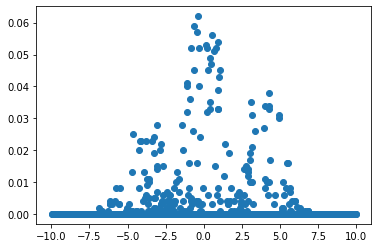

In [142]:
plt.scatter(center[:, 0], xout_new)

(1000,)
(1000,)
(1000,)
(1000,)
(1000,)


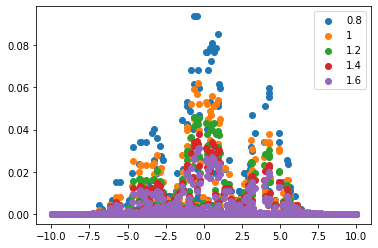

In [146]:
for i in [0.8,1, 1.2, 1.4, 1.6]:
    xout_new = parzen_window_uniform_est_new(inp_points,h=i, center = center)
    plt.scatter(center[:,0], xout_new)

plt.legend(['0.8', '1', '1.2', '1.4', '1.6'])
plt.show()

In [144]:
xout_new.shape

(1000, 1)

In [86]:
center.shape

(1000, 2)

In [145]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame({'x': center[:, 0], 'y':center[:, 1], 'z': xout_new[:,0]})
fig = px.scatter_3d(df, x='x', y='y', z='z')
fig.show()

In [59]:
np.array(tp_points).shape

(1000, 2)

(array([ 28.,  71.,  94.,  61., 238., 181.,  71., 131., 109.,  16.]),
 array([-6.6233753 , -5.27039785, -3.9174204 , -2.56444296, -1.21146551,
         0.14151193,  1.49448938,  2.84746683,  4.20044427,  5.55342172,
         6.90639917]),
 <BarContainer object of 10 artists>)

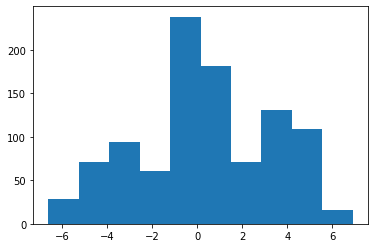

In [94]:
plt.hist(np.array(tp_points)[:,0])

In [99]:
np.array(tp_points).shape

(1000, 2)

In [100]:
# K-means clustering distance metric for d-dimension 
def calc_distance(X1, X2):
    return np.sqrt(sum((X1-X2)**2))


In [101]:
# decide on number of clusters and initial cluster means

num_Clusters = k
cent = random.sample(tp_points, num_Clusters)

num_iter = 100
cluster_assignment = [0]*len(tp_points)
for i in range(0,num_iter):
    # print(cent)
    new_mean = np.zeros((num_Clusters, d))
    for j,points in enumerate(tp_points):
        dist = []
        for cent_points in cent:
            dist.append(calc_distance(points, cent_points))
        
        cluster_assignment[j] = dist.index(min(dist))
        
    for q in range(0,num_Clusters):
        t_num = 0
        for r,items in enumerate(cluster_assignment):
            if (items==q):
                new_mean[q]+=tp_points[r]
                t_num+=1
                
        new_mean[q]/=t_num
    
    cent = new_mean


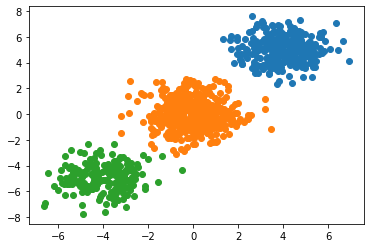

In [102]:
### k-means custom clustering output ###

d_points_calc = []
for q in range(0, num_Clusters):
    d_single_cluster = []
    for j,items in enumerate(cluster_assignment):
        if items==q:
            d_single_cluster.append(tp_points[j])
    d_points_calc.append(d_single_cluster)

for i,items in enumerate(d_points_calc):
    items = np.array(items)
    plt.scatter(items[:,0], items[:,1])
plt.show()

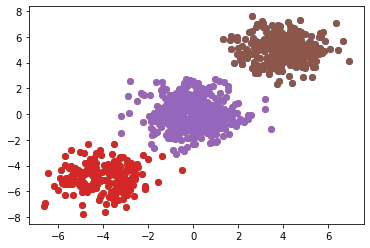

In [103]:
### K-MEANS implementation using sklearn ###

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(tp_points)
out_clusters = kmeans.predict(tp_points)
d_points_calc_new = []
for q in range(0, num_Clusters):
    d_single_cluster = []
    for j,items in enumerate(out_clusters):
        if items==q:
            d_single_cluster.append(tp_points[j])
    d_points_calc.append(d_single_cluster)

for i,items in enumerate(d_points_calc):
    items = np.array(items)
    plt.scatter(items[:,0], items[:,1])
plt.show()

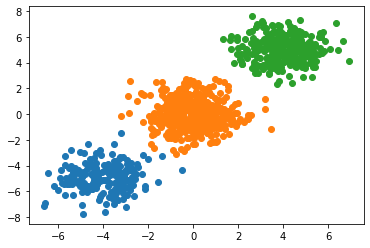

In [104]:
### actual data distribution ### 

for items in d_points:
    plt.scatter(items[:,0], items[:,1])
plt.show()